In [33]:
#import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
#using pandas to access the csv file
calendar = pd.read_csv('calendar.csv')

# ANALYSING THE DATASET

In [35]:
#this helps us to see the first 5 coloumns 
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [36]:
#this helps use to the data tpes and null values in the data set 
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [37]:
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [38]:
#the shows the rows and columns
calendar.shape

(1393570, 4)

In [12]:
'''this are the questions posed from this dataset 
question 1 what is the average cost 
question 2 what's the busiest  time of the year
question 3 what's the most expensive and cheapest time of the year'''

"this are the questions posed from this dataset \nquestion 1 what is the average cost \nquestion 2 what's the busiest  time of the year\nquestion 3 what's the most expensive and cheapest time of the year"

In [39]:
# question 1
# breaking down date column date to month year and  day
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar['day'] = calendar['date'].dt.day

In [40]:
# since available columns t and f wwe can simply replace them with 1 and 0
calendar['available'].replace({'t':1,'f':0},inplace=True)


In [41]:
# Replace '$' with an empty string and convert to numeric
calendar['price'] = pd.to_numeric(calendar['price'].replace('[\$,]', '', regex=True), errors='coerce')

In [42]:
mean_price = calendar['price'].mean()
calendar['price'].fillna(mean_price, inplace=True)

In [43]:
# Calculate the average price per night for each month
usual_price_per_month = calendar.groupby(['year', 'month'])['price'].mean()


In [44]:
calendar.head()

,listing_id,date,available,price,month,year,day
0,241032,2016-01-04,1,85.000000,1,2016,4
1,241032,2016-01-05,1,85.000000,1,2016,5
2,241032,2016-01-06,0,137.944859,1,2016,6
3,241032,2016-01-07,0,137.944859,1,2016,7
4,241032,2016-01-08,0,137.944859,1,2016,8


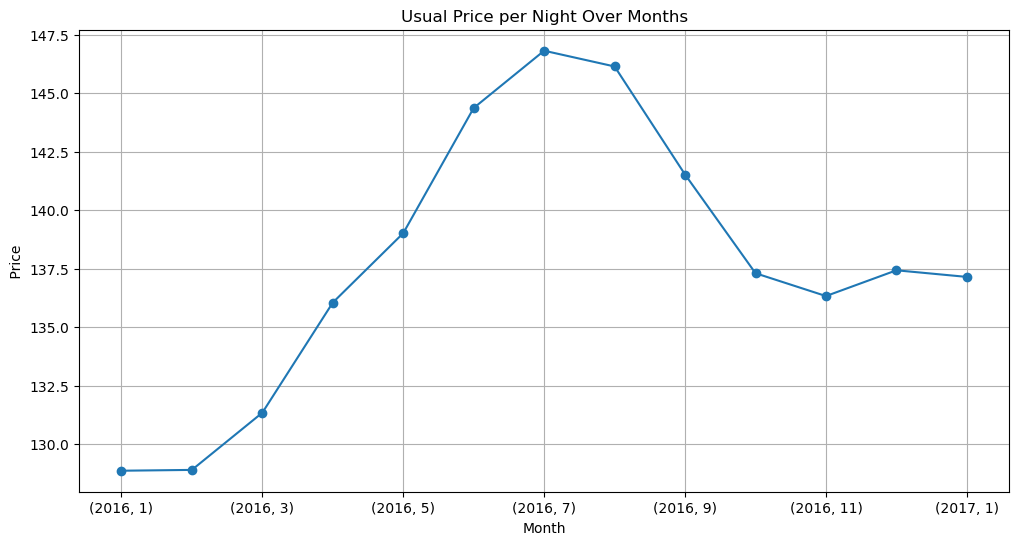

In [45]:
# Plotting
plt.figure(figsize=(12, 6))
usual_price_per_month.plot(marker='o', linestyle='-')
plt.title('Usual Price per Night Over Months')
plt.xlabel('Month')
plt.ylabel(' Price ')
plt.grid(True)
plt.show()

In [46]:
# Extract month from the 'date' column
calendar['Month'] = pd.DatetimeIndex(calendar['date']).month

# Group by month and calculate average monthly price and availability rate
Grouped_Month = calendar.groupby("Month").agg(
    avg_Monthly_Price=("price", "mean"),
    Aval_Month=("available", "mean")
).sort_values(by="Aval_Month", ascending=False)

# Print the grouped data
print(Grouped_Month)

       avg_Monthly_Price  Aval_Month
Month                               
12            137.435089    0.735573
11            136.334019    0.713986
3             131.349153    0.709187
10            137.308997    0.696514
5             139.021420    0.675670
9             141.526668    0.674402
6             144.370582    0.674384
4             136.054321    0.663847
2             128.905102    0.662208
8             146.144582    0.645051
7             146.817843    0.627097
1             129.422270    0.566937


In [48]:
'''
   the details  above shows that july being the  seventh month of the year on average is the most expensive and january being the first month of the year on average is the cheapest 
'''

'\n   the details  above shows that july being the  seventh month of the year on average is the most expensive and january being the first month of the year on average is the cheapest \n'

In [49]:
'''  it also shows that the summer time is the busiest time of the year  and the most expensive time of the year  '''

'  it also shows that the summer time is the busiest time of the year  and the most expensive time of the year  '

In [50]:
''' also  by calcuating the mean of price we can say that the averge price per night is $137 '''

' also  by calcuating the mean of price we can say that the averge price per night is $137 '